The exponential growth of network traffic has led to an increase in networkanomalies, such as cyber attacks, network failures, and hardware malfunctions.Network anomaly detection is a critical task for maintaining the security andstability of computer  networks.The objective of this assignment is to understand how K-Means and Normalized Cut algorithms can be usedfor network anomaly detection.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import precision_recall_fscore_support
#Classifier for training the data.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
#for getting the data from the file path
import os
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score

#To split the data
from sklearn.model_selection import train_test_split

#for the confusion matrix
from sklearn import metrics

from sklearn.metrics.pairwise import rbf_kernel
from scipy.optimize import linear_sum_assignment
#useful for plotting
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading and understanding the data.

In [2]:
feature = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

In [3]:
#The training set.
train_10p = pd.read_csv("E:/term 8/pattern/assignment 2/kddcup.data_10_percent.gz", names = feature)
train_original = pd.read_csv("E:/term 8/pattern/assignment 2/kddcup.data_10_percent.gz", names = feature)

In [4]:
#The training set.
trainsc = pd.read_csv("E:/term 8/pattern/assignment 2/kddcup.data.gz", names = feature)

In [5]:
#The test set.
test = pd.read_csv("E:/term 8/pattern/assignment 2/corrected.gz", names = feature)

In [6]:
train_10p

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [7]:
train_original

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [8]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311025,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311026,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311027,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.


#### checking if there is any null values in the traing and test sets

In [9]:
trainsc.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### Changing the categorical features to numerical in train and test sets.

In [11]:
trainsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [12]:
def numericdata(features, data):
    #checking the datatype for each column.
    dt =[]

    for i in feature:
        dt.append(data[i].dtype == 'float64' or data[i].dtype == 'int64')
        
    for i, j in zip(feature, dt):
        if (not j):
            for m, n in enumerate(data[i].unique()):
                data[i].replace(n, m, inplace=True)

    for i, j in zip(feature, dt):
        if (not j):
            data[i] = data[i].astype('float64')

In [13]:
numericdata(feature, trainsc)

In [14]:
numericdata(feature, train_10p)

In [15]:
def create_numeric_mapping(numbers, strings):
    mapping = {}
    for i in range(len(strings)):
        if strings[i] not in mapping:
            mapping[strings[i]] = numbers[i]
    return mapping

In [16]:
protocol_type_mapping = create_numeric_mapping(train_10p['protocol_type'], train_original['protocol_type'])
service_mapping = create_numeric_mapping(train_10p['service'], train_original['service'])
flag_mapping = create_numeric_mapping(train_10p['flag'], train_original['flag'])
target_mapping = create_numeric_mapping(train_10p['target'], train_original['target'])

In [17]:
train_10p.drop_duplicates(inplace=True)
train_original.drop_duplicates(inplace=True)
trainsc.drop_duplicates(inplace=True)

In [18]:
protocol_type_mapping

{'tcp': 0.0, 'udp': 1.0, 'icmp': 2.0}

In [19]:
test['protocol_type'] = [protocol_type_mapping[i] for i in test['protocol_type']]

In [20]:
test['service'].unique()

array(['private', 'domain_u', 'http', 'smtp', 'ftp_data', 'ftp', 'eco_i',
       'other', 'auth', 'ecr_i', 'IRC', 'X11', 'finger', 'time', 'domain',
       'telnet', 'pop_3', 'ldap', 'login', 'name', 'ntp_u', 'http_443',
       'sunrpc', 'printer', 'systat', 'tim_i', 'netstat', 'remote_job',
       'link', 'urp_i', 'sql_net', 'bgp', 'pop_2', 'tftp_u', 'uucp',
       'imap4', 'pm_dump', 'nnsp', 'courier', 'daytime', 'iso_tsap',
       'echo', 'discard', 'ssh', 'whois', 'mtp', 'gopher', 'rje', 'ctf',
       'supdup', 'hostnames', 'csnet_ns', 'uucp_path', 'nntp',
       'netbios_ns', 'netbios_dgm', 'netbios_ssn', 'vmnet', 'Z39_50',
       'exec', 'shell', 'efs', 'klogin', 'kshell', 'icmp'], dtype=object)

In [21]:
train_original['service'].unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

In [22]:
for i in range(len(test['service'])):
    try:
        test['service'][i] = service_mapping[test['service'][i]]
    except KeyError:
        test['service'][i] = max(service_mapping.values())+1

In [23]:
test['flag'] = [flag_mapping[i] for i in test['flag']]

In [24]:
test['target'].unique()

array(['normal.', 'snmpgetattack.', 'named.', 'xlock.', 'smurf.',
       'ipsweep.', 'multihop.', 'xsnoop.', 'sendmail.', 'guess_passwd.',
       'saint.', 'buffer_overflow.', 'portsweep.', 'pod.', 'apache2.',
       'phf.', 'udpstorm.', 'warezmaster.', 'perl.', 'satan.', 'xterm.',
       'mscan.', 'processtable.', 'ps.', 'nmap.', 'rootkit.', 'neptune.',
       'loadmodule.', 'imap.', 'back.', 'httptunnel.', 'worm.',
       'mailbomb.', 'ftp_write.', 'teardrop.', 'land.', 'sqlattack.',
       'snmpguess.'], dtype=object)

In [25]:
train_original['target'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [26]:
for i in range(len(test['target'])):
    try:
        test['target'][i] = service_mapping[test['target'][i]]
    except KeyError:
        test['target'][i] = max(service_mapping.values())+1

In [27]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,1.0,11.0,0.0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,66.0
1,0,1.0,11.0,0.0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,66.0
2,0,1.0,11.0,0.0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,66.0
3,0,1.0,11.0,0.0,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,66.0
4,0,1.0,11.0,0.0,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,1.0,11.0,0.0,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,66.0
311025,0,1.0,11.0,0.0,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,66.0
311026,0,1.0,11.0,0.0,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,66.0
311027,0,1.0,11.0,0.0,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,66.0


In [28]:
trainsc

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,0.0,0.0,0.0,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0
1,0,0.0,0.0,0.0,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,0.0
2,0,0.0,0.0,0.0,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,0.0
3,0,0.0,0.0,0.0,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,0.0
4,0,0.0,0.0,0.0,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,0.0,0.0,0.0,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,0.0
4898427,0,0.0,0.0,0.0,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,0.0
4898428,0,0.0,0.0,0.0,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,0.0
4898429,0,0.0,0.0,0.0,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,0.0


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

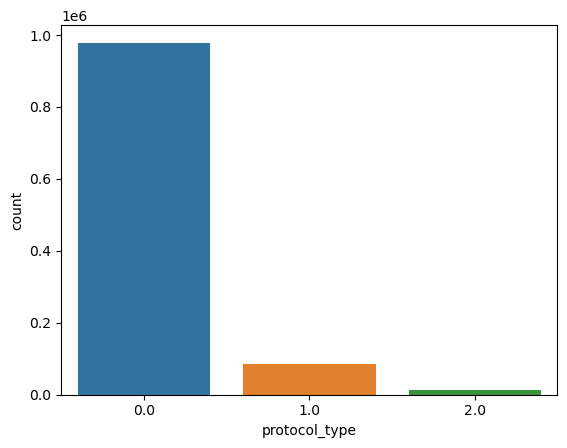

In [29]:
sns.countplot(trainsc['protocol_type'])

<AxesSubplot:xlabel='service', ylabel='count'>

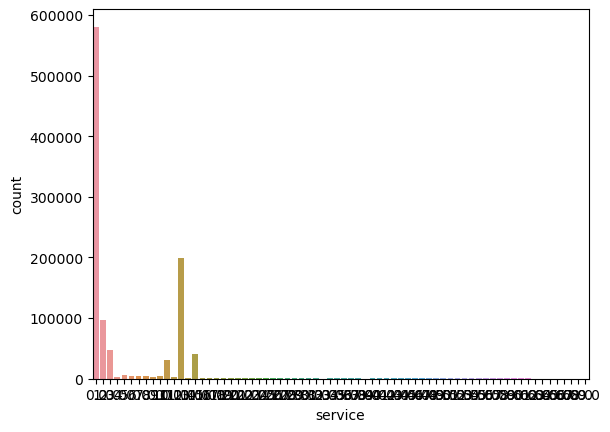

In [30]:
sns.countplot(trainsc['service'])

<AxesSubplot:xlabel='flag', ylabel='count'>

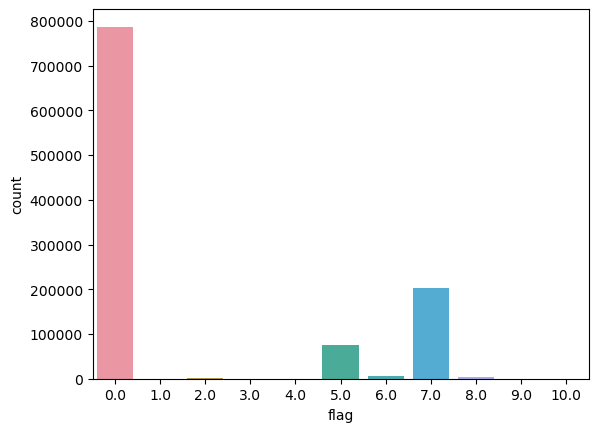

In [31]:
sns.countplot(trainsc['flag'])

<AxesSubplot:xlabel='target', ylabel='count'>

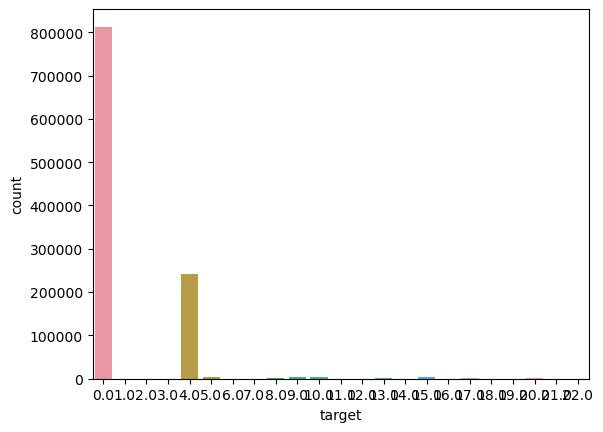

In [32]:
sns.countplot(trainsc['target'])

In [33]:
#getting the target in a seperate varaible
targetsc = trainsc['target']
print(targetsc.unique())
trainsc = trainsc.drop('target', axis = 1)
#for 10 percent 
target_10p = train_10p['target']
train_10p = train_10p.drop('target', axis = 1)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22.]


In [34]:
# get the number of unique values in each column
for col in train_10p.columns:
    num_unique = train_10p[col].nunique()
    print(f"Number of unique values in column {col}: {num_unique}")

Number of unique values in column duration: 2495
Number of unique values in column protocol_type: 3
Number of unique values in column service: 66
Number of unique values in column flag: 11
Number of unique values in column src_bytes: 3300
Number of unique values in column dst_bytes: 10725
Number of unique values in column land: 2
Number of unique values in column wrong_fragment: 3
Number of unique values in column urgent: 4
Number of unique values in column hot: 22
Number of unique values in column num_failed_logins: 6
Number of unique values in column logged_in: 2
Number of unique values in column num_compromised: 23
Number of unique values in column root_shell: 2
Number of unique values in column su_attempted: 3
Number of unique values in column num_root: 20
Number of unique values in column num_file_creations: 18
Number of unique values in column num_shells: 3
Number of unique values in column num_access_files: 7
Number of unique values in column num_outbound_cmds: 1
Number of uniqu

In [35]:
train_10p = train_10p.drop('num_outbound_cmds', axis = 1)
train_10p = train_10p.drop('is_host_login', axis = 1)

In [36]:
numericdata(feature, test)

In [37]:
#getting the target of test
target_test = test['target']
test = test.drop('target', axis = 1)

In [38]:
test = test.drop('num_outbound_cmds', axis = 1)
test = test.drop('is_host_login', axis = 1)

In [39]:
# get the number of unique values in each column
for col in test.columns:
    num_unique = test[col].nunique()
    print(f"Number of unique values in column {col}: {num_unique}")

Number of unique values in column duration: 745
Number of unique values in column protocol_type: 3
Number of unique values in column service: 29
Number of unique values in column flag: 11
Number of unique values in column src_bytes: 2504
Number of unique values in column dst_bytes: 9202
Number of unique values in column land: 2
Number of unique values in column wrong_fragment: 3
Number of unique values in column urgent: 4
Number of unique values in column hot: 18
Number of unique values in column num_failed_logins: 5
Number of unique values in column logged_in: 2
Number of unique values in column num_compromised: 24
Number of unique values in column root_shell: 2
Number of unique values in column su_attempted: 3
Number of unique values in column num_root: 21
Number of unique values in column num_file_creations: 12
Number of unique values in column num_shells: 4
Number of unique values in column num_access_files: 5
Number of unique values in column is_guest_login: 2
Number of unique val

In [40]:
X_10p = np.array(train_10p)
y_10p = np.array(target_10p).astype(int)

In [41]:
np.isnan(X_10p).sum()

0

In [42]:
# normalize the array between 0 and 1 according to each column
norm = np.linalg.norm(X_10p, axis=0, keepdims=True)
normalized_10p = X_10p / norm

In [43]:
len(np.unique(y_10p))

23

In [44]:
def mapping(predicted,true,K):
    rows = len(true)
    labels_number=len(np.unique(true))
    mape = np.zeros((K,23))
    maped = np.zeros(rows)
    #Count the number of each true labels in each cluster
    for i in range(rows):
        mape[predicted[i]][true[i]] = mape[predicted[i]][true[i]] + 1
    #Get the max of the count for each cluster to map the cluster to this label
    for i in range(K):
        t = np.argmax(mape,axis=1)
    #Map each sample to its true predicted cluster
    for i in range(rows):
        maped[i] = t[predicted[i]]
        
    #Precision
    purity=0
    for i in range(K):
        P=mape[i][t[i]]/mape[i].sum()
        P=P*(mape[i].sum()/mape.sum())
        if np.isnan(P) == False:
            purity = purity + P
    print('Precision imp : ', purity)
    
    #Recall
    recall=0
    for i in range(K):
        R=mape[i][t[i]]/mape[:,t[i]].sum()
        R=R*(mape[i].sum()/mape.sum())
        if np.isnan(R) == False:
            recall = recall + R
    print('Recall imp : ', recall)
    
    #F-score
    f_score= 2*purity*recall/(purity+recall)
    print('f_score imp : ', f_score)
    
    #Conditional entropy
    entropy=0
    for i in range(K):
        row_entropy=0
        for j in range(labels_number):
            if mape[i][j]!=0:
                fraction_of_label = mape[i][j]/mape[i].sum()
                row_entropy = row_entropy - (fraction_of_label * math.log(fraction_of_label))
        entropy = entropy + (mape[i].sum()/mape.sum())*row_entropy
    print('Conditional Entropy imp : ', entropy)
    
    
    return maped,t

In [45]:
def Kmeans(X, K, target,max_iter=10000):
    print(f"---------->For K = {K}:")    
    rows,columns = X.shape
    #randomly intialize K centroids
    centroids = np.random.rand(K,columns)
    for i in range(max_iter):
        #assign each point to a cluster
        distances = euclidean_distances(X, centroids)
        if i != 0:
            old_labels = labels
        labels = np.argmin(distances, axis=1)
        if i !=0:
            if(old_labels == labels).all():
                break
        #update the centroids
        for k in range(K):
            centroids[k] = np.mean(X[labels == k], axis=0)
            if np.isnan(centroids[k]).sum() != 0:
                random_row = np.random.choice(rows)
                centroids[k] = X[random_row, :]
        if (i%100 == 0 and i!=0):
            print(f"----->for {i+1} iterations:")
            maped = mapping(labels,target,K)
    print(f"----->for {i+1} iterations:")
    maped,matching = mapping(labels,target,K)
    print("------------------------------------------------------------------------")
    return centroids, labels, maped , matching

In [46]:
cent7,label7,maped7,matching7 = Kmeans(normalized_10p,7,y_10p)
cent15,label15,maped15,matching15 = Kmeans(normalized_10p,15,y_10p)
cent23,label23,maped23,matching23 = Kmeans(normalized_10p,23,y_10p)
cent31,label31,maped31,matching31 = Kmeans(normalized_10p,31,y_10p)
cent45,label45,maped45,matching45 = Kmeans(normalized_10p,45,y_10p)

---------->For K = 7:
----->for 15 iterations:
Precision imp :  0.926806148942893
Recall imp :  0.4645808617153053
f_score imp :  0.6189168017534502
Conditional Entropy imp :  0.25180270730578797
------------------------------------------------------------------------
---------->For K = 15:
----->for 25 iterations:
Precision imp :  0.9618095146511341
Recall imp :  0.26262851325564524
f_score imp :  0.4125951613897315
Conditional Entropy imp :  0.1497865568172105
------------------------------------------------------------------------
---------->For K = 23:
----->for 51 iterations:
Precision imp :  0.9423502259832676
Recall imp :  0.20452460011246623
f_score imp :  0.33610259594107056
Conditional Entropy imp :  0.17300239555885955
------------------------------------------------------------------------
---------->For K = 31:
----->for 37 iterations:
Precision imp :  0.9754234610470784
Recall imp :  0.19768938170061714
f_score imp :  0.328750745681071
Conditional Entropy imp :  0.0927692

In [47]:
print("clusters at K=7")
unique_vals, counts = np.unique(maped7, return_counts=True)
for val, count in zip(unique_vals, counts):
    print(f"{val}: {count}")
print("clusters at K=15")
unique_vals, counts = np.unique(maped15, return_counts=True)

for val, count in zip(unique_vals, counts):
    print(f"{val}: {count}")
print("clusters at K=23")
unique_vals, counts = np.unique(maped23, return_counts=True)

for val, count in zip(unique_vals, counts):
    print(f"{val}: {count}")
print("clusters at K=31")   
unique_vals, counts = np.unique(maped31, return_counts=True)

for val, count in zip(unique_vals, counts):
    print(f"{val}: {count}")
print("clusters at K=45")     
unique_vals, counts = np.unique(maped45, return_counts=True)

for val, count in zip(unique_vals, counts):
    print(f"{val}: {count}")

clusters at K=7
0.0: 87791
4.0: 57795
clusters at K=15
0.0: 91803
4.0: 53032
10.0: 751
clusters at K=23
0.0: 85853
4.0: 56859
8.0: 910
10.0: 754
15.0: 782
20.0: 428
clusters at K=31
0.0: 90393
4.0: 51952
5.0: 719
6.0: 62
8.0: 910
10.0: 775
15.0: 751
19.0: 24
clusters at K=45
0.0: 90252
4.0: 52281
5.0: 428
6.0: 65
8.0: 910
9.0: 1
10.0: 850
11.0: 20
15.0: 757
19.0: 22


In [48]:
target_test = np.array(target_test).astype(int)
# normalize the array between 0 and 1 according to each column
test = np.array(test)
norm = np.linalg.norm(test, axis=0, keepdims=True)
n_test = test / norm

In [49]:
#At k = 7
distances = euclidean_distances(n_test, cent7)
labels = np.argmin(distances, axis=1)
#Map each sample to its true predicted cluster
xa = []
for i in range(311029):
    xa.append(matching7[labels[i]])
    # compute the accuracy score
accuracy = accuracy_score(target_test, xa)

# print the accuracy score
print(f'Accuracy: {accuracy:.4f}')

_,_=mapping(xa,target_test,7)

Accuracy: 0.8024
Precision imp :  1.0
Recall imp :  0.682838362427513
f_score imp :  0.8115317283859765
Conditional Entropy imp :  0.0


In [50]:
#At k = 15
distances = euclidean_distances(n_test, cent15)
labels = np.argmin(distances, axis=1)
#Map each sample to its true predicted cluster
xa = []
for i in range(311029):
    xa.append(matching15[labels[i]])
    # compute the accuracy score
accuracy = accuracy_score(target_test, xa)

# print the accuracy score
print(f'Accuracy: {accuracy:.4f}')

_,_=mapping(xa,target_test,15)

Accuracy: 0.8021
Precision imp :  1.0
Recall imp :  0.6818549900150955
f_score imp :  0.8108368367821954
Conditional Entropy imp :  0.0


In [51]:
#At k = 23
distances = euclidean_distances(n_test, cent23)
labels = np.argmin(distances, axis=1)
#Map each sample to its true predicted cluster
xa = []
for i in range(311029):
    xa.append(matching23[labels[i]])
    # compute the accuracy score
accuracy = accuracy_score(target_test, xa)

# print the accuracy score
print(f'Accuracy: {accuracy:.4f}')

_,_=mapping(xa,target_test,23)

Accuracy: 0.8013
Precision imp :  0.9999999999999999
Recall imp :  0.6783514747221944
f_score imp :  0.8083544894366981
Conditional Entropy imp :  0.0


In [52]:
#At k = 31
distances = euclidean_distances(n_test, cent31)
labels = np.argmin(distances, axis=1)
#Map each sample to its true predicted cluster
xa = []
for i in range(311029):
    xa.append(matching31[labels[i]])
    # compute the accuracy score
accuracy = accuracy_score(target_test, xa)

# print the accuracy score
print(f'Accuracy: {accuracy:.4f}')

_,_=mapping(xa,target_test,31)

Accuracy: 0.8030
Precision imp :  1.0
Recall imp :  0.6806512189481596
f_score imp :  0.8099850953895682
Conditional Entropy imp :  0.0


In [53]:
#At k = 45
distances = euclidean_distances(n_test, cent45)
labels = np.argmin(distances, axis=1)
#Map each sample to its true predicted cluster
xa = []
for i in range(311029):
    xa.append(matching45[labels[i]])
    # compute the accuracy score
accuracy = accuracy_score(target_test, xa)

# print the accuracy score
print(f'Accuracy: {accuracy:.4f}')

_,_=mapping(xa,target_test,45)

Accuracy: 0.8021
Precision imp :  0.9999999999999999
Recall imp :  0.6795971425461022
f_score imp :  0.8092382695006262
Conditional Entropy imp :  0.0


In [54]:
trainsc = np.asarray(trainsc)
train_target = np.array(targetsc)

In [55]:
random_seed = 42

In [82]:
X_train, X_test, y_train, y_test = train_test_split(trainsc, train_target, train_size = 0.025, stratify = train_target
                                                   , random_state = random_seed)

In [83]:
len(np.unique(y_train))

15

In [84]:
#Similarity matrix
sim_matrix = rbf_kernel(X_train, gamma = 10)

In [85]:
sim_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [86]:
sim_matrix.shape

(26874, 26874)

In [87]:
# Construct the diagonal degree matrix D
D = np.diag(np.sum(sim_matrix, axis=1))
    
# Construct the Laplacian matrix L
L = D - sim_matrix

In [88]:
D

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [89]:
L

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.10325593e-09]])

In [90]:
np.iscomplex(L).sum()

0

In [91]:
#getting the eigen values and eigen vectors
EVA, EVE = np.linalg.eig(L)

In [92]:
#getting the real values of the both EVA and EVE
EVA = EVA.real
EVE = EVE.real

In [93]:
#sort the Eigen values and vectors
idx = EVA.argsort()
eigen_values = EVA[idx]
eigen_vectors = EVE[:,idx]

In [94]:
eigen_vectors.shape

(26874, 26874)

In [95]:
eigen_vectors = eigen_vectors[:, :23]

In [96]:
np.unique(eigen_vectors)

array([-0.6880859 , -0.68808589, -0.60584863, ...,  0.37452981,
        0.6352043 ,  0.69992584])

In [97]:
#getting the normalized eigen vectors
norm = np.linalg.norm(eigen_vectors, axis=0, keepdims=True)
normalized_Y = eigen_vectors / norm

In [98]:
normalized_Y.sum()

-4.813731576378597

In [101]:
np.isnan(normalized_Y).sum()

0

In [105]:
centsc,labelsc,mapedsc,_ = Kmeans(normalized_Y,15,y_train.astype(int))

---------->For K = 15:
----->for 47 iterations:
Precision imp :  0.7771079854134106
Recall imp :  0.9169919934932255
f_score imp :  0.8412747884734141
Conditional Entropy imp :  0.5864832221338525
------------------------------------------------------------------------


In [106]:
cents,labels,mapeds,matchings = Kmeans(np.array(X_train),15,y_train.astype(int))

---------->For K = 15:
----->for 101 iterations:
Precision imp :  0.7562327900573044
Recall imp :  0.6795319164263905
f_score imp :  0.7158336108576746
Conditional Entropy imp :  0.5613180460341411
----->for 148 iterations:
Precision imp :  0.7562327900573044
Recall imp :  0.7202307078555095
f_score imp :  0.7377928116156947
Conditional Entropy imp :  0.5686262444696623
------------------------------------------------------------------------
